<img src="/notebooks/images/logos/ncar_pythia.png" alt="pythia ncar" />

**This notebook is developed during the pythia cook-off at NCAR Mesa-Lab Boulder Colorado, June 12-14, 2024**

Participants in the workshop event have the chance to practice collaborative problem-solving and hands-on learning in the field of Python programming.

This notebook is part of the **Breakout Topic: Geostationary on AWS**, lead by **Jorge Humberto Bravo Mendez** jbravo2@stevens.edu, from Stevens Institute of Technology 

Contributors - Tri Nguyen, Srihari Sundar

# Real time access and visualize scene without downloading data

---

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', SyntaxWarning)

from satpy.scene import Scene
from satpy.utils import debug_on

from datetime import datetime

import numpy as np
import botocore
import boto3

In [4]:
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

result = client.list_objects(Bucket='noaa-goes16',
                             Prefix='ABI-L1b-RadC/2024/164/19',
                             Delimiter='*'
                             )
timestamps_of_files = np.array([obj["LastModified"] for obj in result['Contents']])

In [5]:
start_time_string = result['Contents'][timestamps.argmax()]['Key'].split("_")[3]

In [9]:
file_string = 'ABI-L1b-RadC/2024/164/19/*'+start_time_string+'*/'
filenames = ['s3://noaa-goes16/'+file_string]

In [10]:
storage_options = {'anon': True}
scn = Scene(reader='abi_l1b', filenames=filenames, reader_kwargs={'storage_options': storage_options})

['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16']


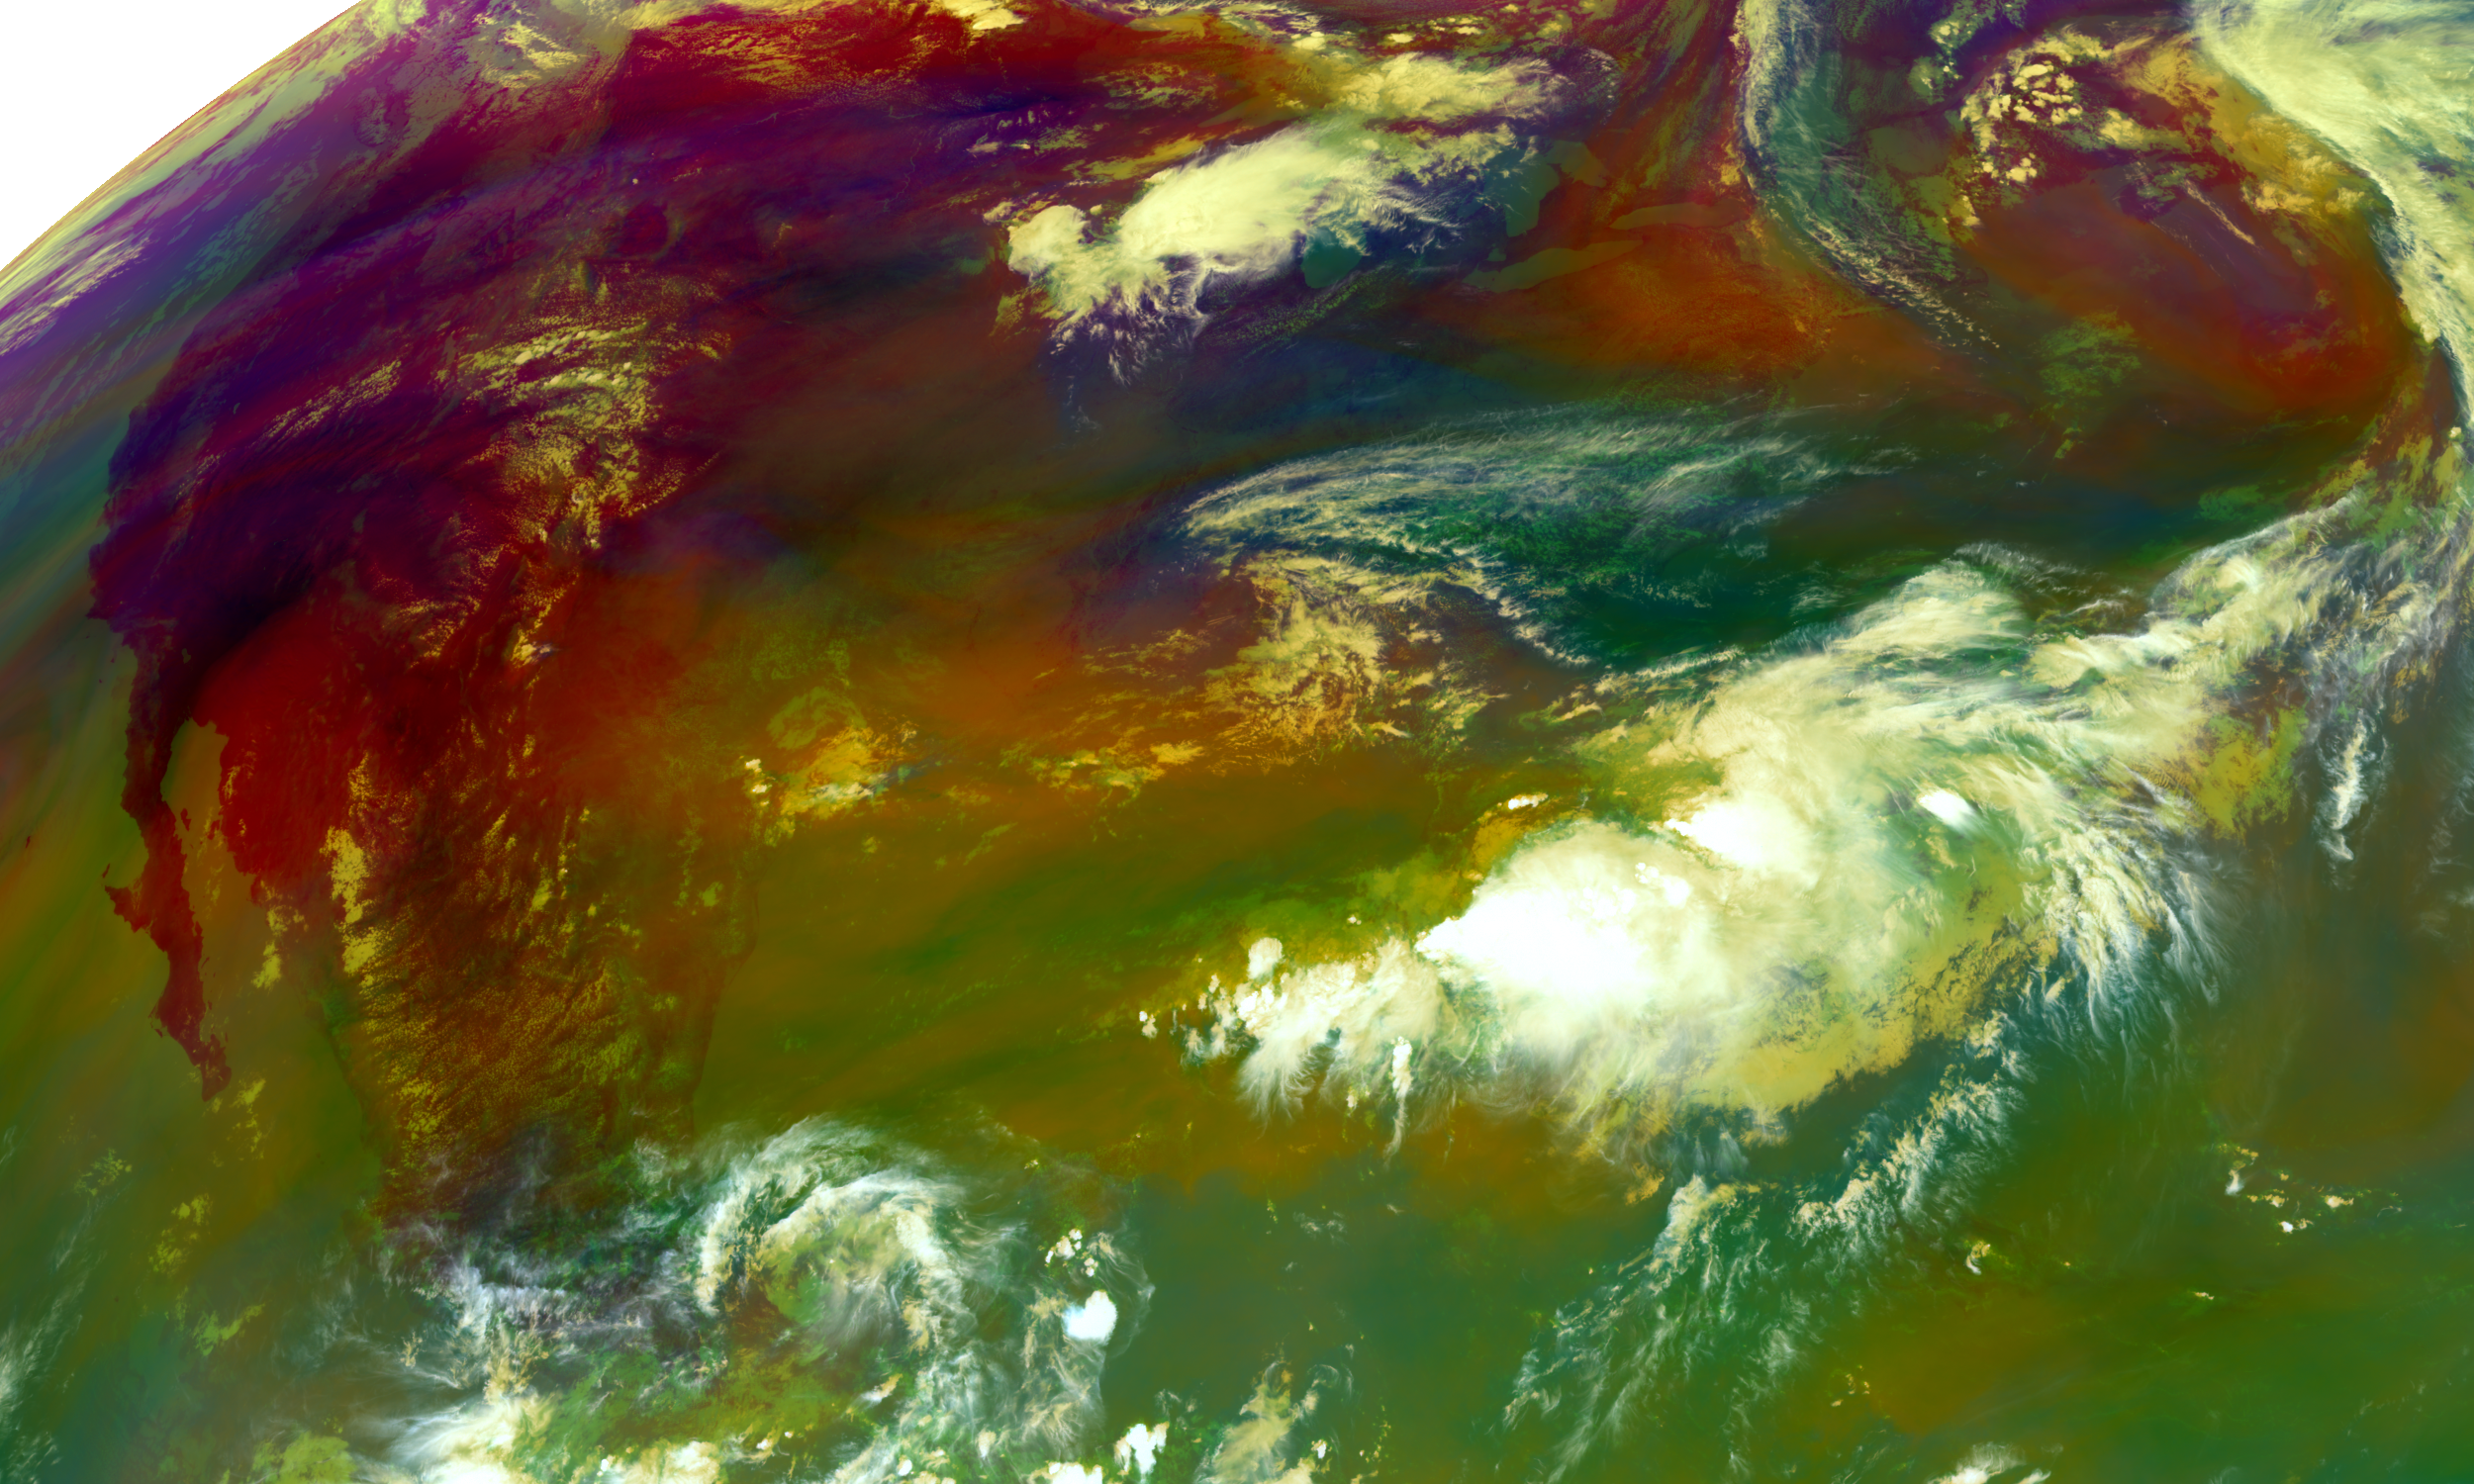

In [29]:
dataset_names = scn.all_dataset_names()

print(dataset_names)

scn.load(dataset_names)
rgb_im = 'airmass'

scn.load([rgb_im])
scn.show(rgb_im)

In [11]:
# Tri's code

import boto3
import botocore
from datetime import datetime, timedelta
# Initialize S3 client with unsigned requests
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))
# Get the current time in UTC
current_time = datetime.utcnow()
# Extract components
year = current_time.year
day_of_year = current_time.timetuple().tm_yday
hour = current_time.hour
minute = current_time.minute
second = current_time.second
# Format components to match the filename structure
day_of_year_str = f"{day_of_year:03d}"  # Day of year in 3 digits
hour_str = f"{hour:02d}"  # Hour in 2 digits
minute_str = f"{minute:02d}"  # Minute in 2 digits
second_str = f"{second:02d}"  # Second in 2 digits
# Generate the prefix for the S3 path
prefix = f"s{year}{day_of_year_str}{hour_str}{minute_str}{second_str}"
# Generate the S3 path
s3_path = f"noaa-goes16/ABI-L1b-RadC/{year}/{day_of_year_str}/{hour_str}/"
print(f"Generated S3 path: s3://{s3_path}*_G16_{prefix}*")

Generated S3 path: s3://noaa-goes16/ABI-L1b-RadC/2024/165/16/*_G16_s2024165164224*
